In [163]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


In [164]:
def synthetic_data(w, b, num_examples):  
    '''生成y = Xw + b + 噪声'''
    X = torch.normal(0,1,(num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0,0.01, y.shape)
    return X , y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [165]:
print('features: ', features[0], '\nlabel', labels[0])


features:  tensor([-0.4194, -0.9422]) 
label tensor([6.5659])


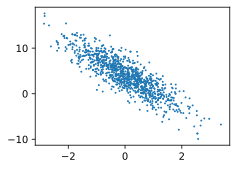

In [166]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [167]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    # This samples are randomly selected, not in order
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])

        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features,  labels):
    print (X, '\n', y)
    break

tensor([[ 1.1481,  1.0783],
        [ 1.1122, -0.3268],
        [ 0.9904,  0.1500],
        [ 0.7965, -0.4070],
        [-0.2513, -0.0335],
        [-1.0552, -1.0018],
        [ 1.1713,  0.6036],
        [-0.6213, -0.2023],
        [ 0.3010, -1.8368],
        [-0.0178,  0.0060]]) 
 tensor([[ 2.8214],
        [ 7.5360],
        [ 5.6664],
        [ 7.1768],
        [ 3.8084],
        [ 5.4920],
        [ 4.4918],
        [ 3.6438],
        [11.0468],
        [ 4.1508]])


定义初始化模型

In [168]:
w = torch.normal(0,0.01, size = (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad= True)


定义模型

In [169]:
def linreg(x, w, b):
    '''linear regression model'''
    return torch.matmul(x,w) + b



定义损失函数

In [170]:
def squared_loss(y_hat,y):
    '''square loss function'''
    return (y_hat - y.reshape(y_hat.shape))**2/2


定义优化算法

In [171]:
def sgd(params, lr, batch_size):
    '''mini batch stochastic gradient descent'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练过程

In [172]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y)  # 'X' 和‘y' 的小批量损失
        # 因为`l`形状是(`batch_size`, 1)，而不是一个标量。`l`中的所有元素被加到一起
        # 并以此计算关于[`w`, `b`]的梯度
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037483
epoch 2, loss 0.000141
epoch 3, loss 0.000054
epoch 4, loss 0.000054
epoch 5, loss 0.000054
epoch 6, loss 0.000054
epoch 7, loss 0.000054
epoch 8, loss 0.000054
epoch 9, loss 0.000054
epoch 10, loss 0.000053


## 线性回归的简洁实现

通过使用深度学习框架来简洁实现线性回归模型，生产数据集

In [173]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [174]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-0.0533,  1.0461],
         [ 1.1691,  1.4477],
         [-1.1969,  0.3113],
         [ 0.6951,  0.9252],
         [-1.1372,  0.3200],
         [ 0.2405, -1.1028],
         [-0.3801, -0.3201],
         [-1.0143, -0.2233],
         [-1.6715, -0.2246],
         [-0.7195,  0.7731]]),
 tensor([[0.5376],
         [1.6122],
         [0.7535],
         [2.4361],
         [0.8316],
         [8.4190],
         [4.5247],
         [2.9257],
         [1.6316],
         [0.1494]])]

In [ ]:
# `nn` is an abbreviation for neural networks
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)